# **Proyecto Final**
###Daniela Susana Vega Monroy

Predicciones del Titanic


In [103]:
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
testData = pd.read_csv("test.csv")
trainData = pd.read_csv("train.csv")

trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print(trainData.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
trainData.sample(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S


In [6]:
trainData.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Guggenheim, Mr. Benjamin",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
print(pd.isnull(trainData).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### **¿Más víctimas o sobrevivientes?**

In [6]:
trainData['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

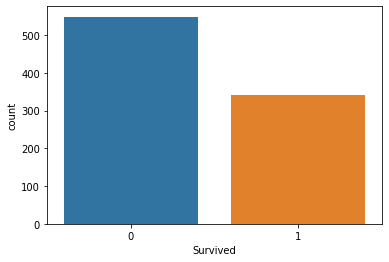

In [9]:
sns.countplot(trainData['Survived'],label="Count")

### **¿Cuál sexo fue el más afectado?**

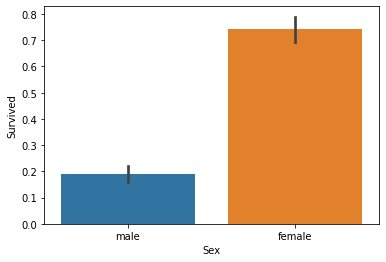

In [10]:
sns.barplot(x="Sex", y="Survived", data=trainData)

### **¿Qué puerto fue el más común entre los sobrevivientes?**

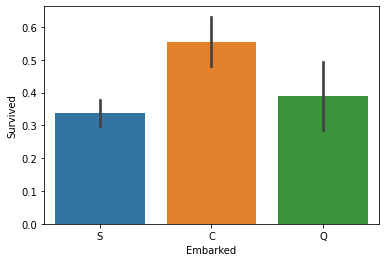

In [11]:
sns.barplot(x="Embarked", y="Survived", data=trainData)

### **¿Qué clase social tuvo más sobrrevivientes?**

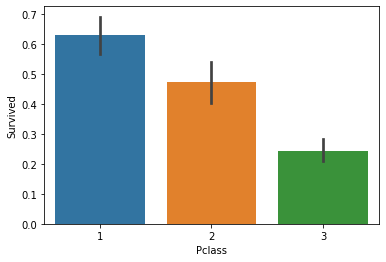

In [12]:
sns.barplot(x="Pclass", y="Survived", data=trainData)

### **¿Las víctimas tenían familiares a bordo?**

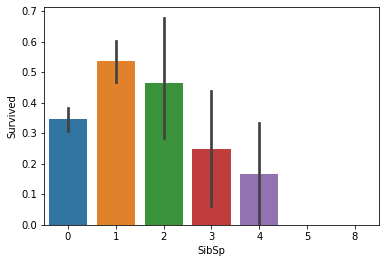

In [13]:
sns.barplot(x="SibSp", y="Survived", data=trainData)

In [17]:
trainData.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [18]:
trainData.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### **Limpieza y ajuste de la información**

El valor de *Ticket* y *Cabin* no nos proporciona información de valor, las podemos eliminar.

In [104]:
trainData.drop(['Ticket'], axis=1, inplace=True)
testData.drop(['Ticket'], axis=1, inplace=True)

In [105]:
trainData.drop(['Cabin'], axis=1, inplace=True)
testData.drop(['Cabin'], axis=1, inplace=True)

In [106]:
trainData.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,"Hart, Mr. Henry",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [107]:
trainData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

Podemos ver en la tabla anterior que Embarked tiene 2 valores faltantes. Procedemos a llenarlos con el valor que más se repite.

In [108]:
s = trainData[trainData["Embarked"] == "S"].shape[0]
c = trainData[trainData["Embarked"] == "C"].shape[0]
q = trainData[trainData["Embarked"] == "Q"].shape[0]

print("S --> Puerto de Southampton")
print(s)
print("C --> Puerto de Cherbourg")
print(c)
print("Q --> Puerto de Queenstown")
print(q)

S --> Puerto de Southampton
644
C --> Puerto de Cherbourg
168
Q --> Puerto de Queenstown
77


Elegimos al valor S para ponerlo en los valores faltantes.

In [109]:
trainData = trainData.fillna({"Embarked": "S"})
testData = testData.fillna({"Embarked": "S"})

In [123]:
totalData = [trainData, testData]
for edades in totalData:
    meanEdad = trainData["Age"].mean()
    stdEdad = testData["Age"].std()
    nullEdad = edades["Age"].isnull().sum()
    edadAlea = np.random.randint(meanEdad - stdEdad, meanEdad + stdEdad, size = nullEdad)
    divEdad = edades["Age"].copy()
    divEdad[np.isnan(divEdad)] = edadAlea
    edades["Age"] = divEdad
    edades["Age"] = trainData["Age"].astype(int)
trainData["Age"].isnull().sum()

0

Convertimos los valores categóricos a valores numéricos.

In [113]:
genders = {"male": 0, "female": 1}
totalData = [trainData, testData]
for gen in totalData:
    gen['Sex'] = gen['Sex'].map(genders)

In [114]:
ports = {"S": 0, "C": 1, "Q": 2}
totalData = [trainData, testData]
for port in totalData:
    port['Embarked'] = port['Embarked'].map(ports)

Y eliminamos a *Name*, variable que no nos será útil.

In [116]:
trainData.drop(['Name'], axis=1, inplace=True)
testData.drop(['Name'], axis=1, inplace=True)

### **Hora de entrenar diferentes modelos de ML**

In [126]:
from sklearn.model_selection import train_test_split

predictors = trainData.drop(['Survived', 'PassengerId'], axis=1)
target = trainData["Survived"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [118]:
trainData.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
100,101,0,3,1,4,0,0,7.8958,0
156,157,1,3,1,1,0,0,7.7333,2
379,380,0,3,0,2,0,0,7.7750,0
560,561,0,3,0,4,0,0,7.7500,2
107,108,1,3,0,3,0,0,7.7750,0


In [131]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
accGNB = round(accuracy_score(y_pred, y_test) * 100, 2)

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accKNN = round(accuracy_score(y_pred, y_test) * 100, 2)


# Logistic Regression
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression()
rl.fit(x_train, y_train)
y_pred = rl.predict(x_test)
accRL = round(accuracy_score(y_pred, y_test) * 100, 2)

# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
accSVC = round(accuracy_score(y_pred, y_val) * 100, 2)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)
accRF = round(accuracy_score(y_pred, y_val) * 100, 2)


models = pd.DataFrame({
    'Model': [ 'Naive Bayes','KNN','Regresión Logística','SVC','Random Forest,'],
    'Score': [accGNB,accKNN,accRL,accSVC,accRF,]})
models.sort_values(by='Score', ascending=False)


,Model,Score
4,"Random Forest,",81.73
2,Regresión Logística,80.71
0,Naive Bayes,79.70
1,KNN,76.14
3,SVC,72.59


In [146]:
rfPred = randomforest.predict(x_val)
print(rfPred)
print()
print(y_val)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 0 1 1 1 0 1 1 0 0 0]

495    0
648    0
278    0
31     1
255    1
      ..
875    1
727    1
428    0
54     0
45     0
Name: Survived, Length: 197, dtype: int64


In [145]:
#Pclass, Sex, Age, Sibsp, Parch, Fare, Embarked
nuevoPasajero = [[1,1,51,0, 0, 0, 0]]
#Hombre de primera clase de 51 años, sin familiares a bordo y de Southampton
#Random Forest
rfPrediction = rf.predict(my_survival)
#Regresión Logística
rlPrediction = rl.predict(my_survival)

msgSobreviviente = 'Eres de los pocos pasajeros que sobrevivió'
msgVíctima = 'Eres una persona víctima de la tragedia del Titanic'
print('RF :',rfPrediction)
if rfPrediction == 0:
  print(msgSobreviviente)
else:
  print(msgVíctima)

print('RL :',rlPrediction)
if rlPrediction == 0:
  print(msgSobreviviente)
else:
  print(msgVíctima)

RF : [1]
Eres una persona víctima de la tragedia del Titanic
RL : [0]
Eres de los pocos pasajeros que sobrevivió
